#### loading data and looking at missing values

In [1]:
import pandas as pd

df = pd.read_csv("ipums_06.csv")

C:\Users\afraa\AppData\Local\Temp\ipykernel_21152\1897879383.py:3: DtypeWarning: Columns (4,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ipums_06.csv")


In [2]:
# show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# calculate missing percentages
total_values = df.shape[0]
missing_values = df.isna().sum()
missing_percentage = (missing_values / total_values) * 100

# print missing percentages
print("Missing Value Percentage:")
print(missing_percentage)

Missing Value Percentage:
YEAR             0.000000
SERIAL           0.000000
STRATA           0.000000
PSU              0.000000
NHISHID          0.000000
HHWEIGHT         5.092393
URBRRL          94.907607
PERNUM           0.000000
NHISPID          0.000000
HHX             25.554928
FMX             30.647320
PX               5.092393
PERWEIGHT        5.092393
SAMPWEIGHT       9.486408
LONGWEIGHT      98.743500
PARTWEIGHT      98.743500
FWEIGHT         30.647320
SUPP2WT         52.843050
ASTATFLG        25.554928
CSTATFLG        25.554928
AGE              0.000000
SEX              0.000000
BIRTHYR         35.724813
RACENEW         32.357812
OCC              2.566444
POORYN           5.092393
INCFAM97ON2     30.647320
INCFAM07ON      60.127877
FAMTOTINC       97.358115
EARNIMP1        30.647320
HINOTCOVE       25.554928
HICOVSTAT       86.824915
HIOTHGOVYR      73.815914
HINOLAPYMO      86.824915
HINOLASTCOV     86.824915
HINOUNEMPR      12.379842
HINOEMPR        17.472235
HINOFAMR    

#### Columns with more than 80% missing values were dropped because imputing missing data would result in artificial or unreliable data.

In [3]:
# identify columns with more than 80% missing values
threshold = 80
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# drop columns with more than 80% missing values
df_cleaned = df.drop(columns=columns_to_drop)

In [4]:
# calculate missing percentages
total_values = df_cleaned.shape[0]
missing_values = df_cleaned.isna().sum()
missing_percentage = (missing_values / total_values) * 100

# print missing percentages
print("Missing Value Percentage of cleaned DF:")
print(missing_percentage)

Missing Value Percentage of cleaned DF:
YEAR             0.000000
SERIAL           0.000000
STRATA           0.000000
PSU              0.000000
NHISHID          0.000000
HHWEIGHT         5.092393
PERNUM           0.000000
NHISPID          0.000000
HHX             25.554928
FMX             30.647320
PX               5.092393
PERWEIGHT        5.092393
SAMPWEIGHT       9.486408
FWEIGHT         30.647320
SUPP2WT         52.843050
ASTATFLG        25.554928
CSTATFLG        25.554928
AGE              0.000000
SEX              0.000000
BIRTHYR         35.724813
RACENEW         32.357812
OCC              2.566444
POORYN           5.092393
INCFAM97ON2     30.647320
INCFAM07ON      60.127877
EARNIMP1        30.647320
HINOTCOVE       25.554928
HIOTHGOVYR      73.815914
HINOUNEMPR      12.379842
HINOEMPR        17.472235
HINOFAMR        17.472235
HINOAGER        17.472235
HINOCOSTR       12.379842
HINOREFUSER     17.472235
HINOTHER        12.379842
HISTOP1         25.554928
HISTOP3         30.64732

#### Dropped columns that weren't required for analyses

In [5]:
columns_to_drop = [
    "STRATA",
    "PSU",
    "HHWEIGHT",
    "HHX",
    "FMX",
    "PX",
    "PERWEIGHT",
    "SAMPWEIGHT",
    "FWEIGHT",
    "SUPP2WT",
    "ASTATFLG",
    "CSTATFLG",
    "BIRTHYR",
    "INCFAM07ON",
    "HIOTHGOVYR",
    "CIGDAYMO",
    "SMOKESTATUS3",
    "MORTSTAT",
    "MORTDODY",
    "MORTUCOD",
    "MORTUCODLD",
    "MORTWT",
    "MORTWTSA",
    "POORYN",
    "SMOKESTATUS1",
    "SMOKESTATUS3",
    "SMOKEV",
]

# drop columns we do not need
df_cleaned_new = df_cleaned.drop(columns=columns_to_drop)

# comment code below if you want to keep variables indicating why insurance coverage stopped (likely do not need for analyses)
column_insurance_stopped = [
    "HISTOP1",
    "HISTOP3",
    "HISTOP4",
    "HISTOP8",
    "HISTOP11",
    "HISTOP12",
    "HISTOP13",
    "HISTOP14",
    "HISTOP15",
    "HISTOP16",
    "HISTOP17",
    "HISTOP18",
    "HISTOP19",
    "HISTOP20",
    "HISTOP22",
    "HISTOP5A",
]

insurance_data = df_cleaned_new.drop(columns=column_insurance_stopped)

In [6]:
insurance_data.columns

Index(['YEAR', 'SERIAL', 'NHISHID', 'PERNUM', 'NHISPID', 'AGE', 'SEX',
       'RACENEW', 'OCC', 'INCFAM97ON2', 'EARNIMP1', 'HINOTCOVE', 'HINOUNEMPR',
       'HINOEMPR', 'HINOFAMR', 'HINOAGER', 'HINOCOSTR', 'HINOREFUSER',
       'HINOTHER', 'CNLUNG', 'CNLUNGAG', 'SMOKESTATUS2'],
      dtype='object')

---

In [7]:
# drop rows where 'YEAR' > 2018 or 'YEAR' < 2000
insurance_data = insurance_data[
    (insurance_data["YEAR"] >= 2000) & (insurance_data["YEAR"] <= 2018)
]

# calculate missing percentages
total_values = insurance_data.shape[0]
missing_values = insurance_data.isna().sum()
missing_percentage = (missing_values / total_values) * 100

# print missing percentages
print("Missing Value Percentage of cleaned DF:")
print(missing_percentage)

Missing Value Percentage of cleaned DF:
YEAR            0.0
SERIAL          0.0
NHISHID         0.0
PERNUM          0.0
NHISPID         0.0
AGE             0.0
SEX             0.0
RACENEW         0.0
OCC             0.0
INCFAM97ON2     0.0
EARNIMP1        0.0
HINOTCOVE       0.0
HINOUNEMPR      0.0
HINOEMPR        0.0
HINOFAMR        0.0
HINOAGER        0.0
HINOCOSTR       0.0
HINOREFUSER     0.0
HINOTHER        0.0
CNLUNG          0.0
CNLUNGAG        0.0
SMOKESTATUS2    0.0
dtype: float64


In [8]:
insurance_data.shape

(1762659, 22)

#### In our analysis, we have dropped all values for where 'YEAR' < 2000 or 'YEAR' > 2018. Despite dropping these values, we still retain a substantial number of observations, totaling 1,762,659. This sizable dataset ensures that our analysis remains robust.

---

#### NOTE: 'RACENEW' variable

In [9]:
insurance_data["RACENEW"].value_counts()

RACENEW
100.0    1338182
200.0     250073
400.0      97853
541.0      38289
300.0      18045
520.0      16690
530.0       3527
Name: count, dtype: int64

Self-reported Race (Post-1997 OMB standards)

RACENEW provides information on self-reported race of sample adults and sample children (and prior to 2019, all persons), using the October 30, 1997 revision of Statistical Policy Directive No. 15, Race and Ethnic Standards for Federal Statistics and Administrative Reporting.

100 White only

200 Black/African American only

300 American Indian/Alaska Native only

400 Asian only

~~500 Other Race and Multiple Race~~

~~510 Other Race and Multiple Race (2019-forward: Excluding American Indian/Alaska Native)~~

520 Other Race

530 Race Group Not Releasable

~~540 Multiple Race~~

541 Multiple Race (1999-2018: Including American Indian/Alaska Native)

~~542 American Indian/Alaska Native and Any Other Race~~

~~997 Unknown-Refused~~

~~998 Unknown-Not ascertained~~

~~999 Unknown-Don't Know~~

In [10]:
# drop records where 'RACENEW' is equal to 530.0
insurance_data = insurance_data[insurance_data["RACENEW"] != 530.0]

> dropped this category since race is not known/released

---

#### dealing with INCFAM97ON2

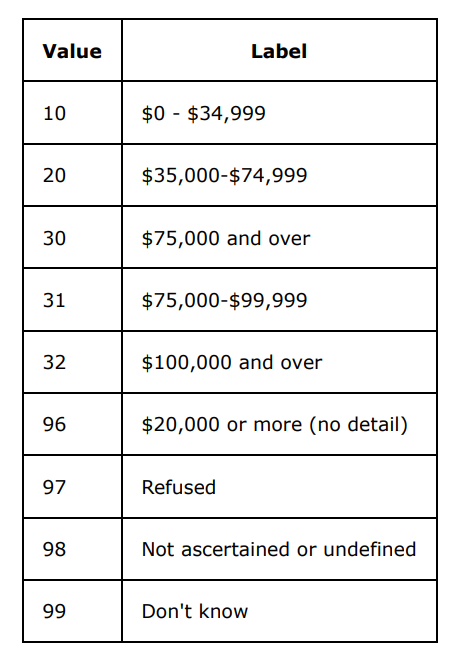

> categories 97, 98, 99 should dropped likely (not dropping yet depending on regression needs)

In [11]:
insurance_data["INCFAM97ON2"].value_counts()

INCFAM97ON2
10.0    541224
20.0    470043
32.0    225207
31.0    118464
30.0    117040
96.0    100649
99.0     92780
98.0     55476
97.0     38249
Name: count, dtype: int64

---

#### dealing with EARNIMP1

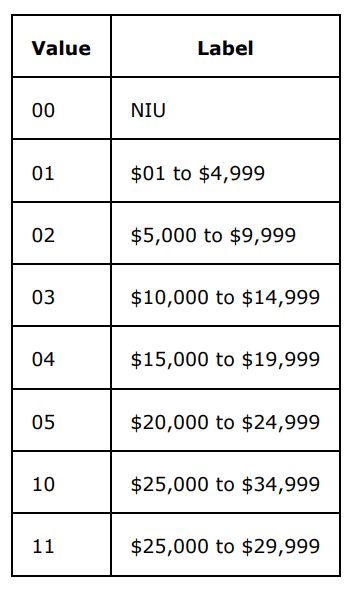

> more categories exist all the way till '70' but category '0' is the focus here since it is Not-In-Universe. Not dropping yet depending on regression needs.

In [12]:
insurance_data["EARNIMP1"].value_counts()

EARNIMP1
0.0     881279
1.0      80644
3.0      79949
5.0      74934
4.0      72240
2.0      72231
10.0     50869
12.0     38966
11.0     37835
20.0     37483
21.0     31352
22.0     30495
60.0     28526
30.0     25877
32.0     25574
70.0     25399
31.0     22884
42.0     18650
40.0     16387
41.0     14983
52.0     12791
51.0     12097
50.0     10839
62.0     10117
61.0      9527
67.0      7962
64.0      6991
63.0      6011
69.0      5046
66.0      4803
65.0      4143
68.0      2248
Name: count, dtype: int64

---

In [13]:
# Print value counts for the filtered 'HINOTCOVE' column
print("Value counts for column 'HINOTCOVE':")
print(insurance_data["HINOTCOVE"].value_counts())

# Print value counts for the filtered 'HINOUNEMPR' column
print("Value counts for column 'HINOUNEMPR':")
print(insurance_data["HINOUNEMPR"].value_counts())

# Print value counts for the filtered 'HINOEMPR' column
print("Value counts for column 'HINOEMPR':")
print(insurance_data["HINOEMPR"].value_counts())

# Print value counts for the filtered 'HINOFAMR' column
print("Value counts for column 'HINOFAMR':")
print(insurance_data["HINOFAMR"].value_counts())

# Print value counts for the filtered 'HINOAGER' column
print("Value counts for column 'HINOAGER':")
print(insurance_data["HINOAGER"].value_counts())

# Print value counts for the filtered 'HINOCOSTR' column
print("Value counts for column 'HINOCOSTR':")
print(insurance_data["HINOCOSTR"].value_counts())

# Print value counts for the filtered 'HINOREFUSER' column
print("Value counts for column 'HINOREFUSER':")
print(insurance_data["HINOREFUSER"].value_counts())

# Print value counts for the filtered 'HINOTHER' column
print("Value counts for column 'HINOTHER':")
print(insurance_data["HINOTHER"].value_counts())

Value counts for column 'HINOTCOVE':
HINOTCOVE
1.0    1479332
2.0     262615
9.0      17185
Name: count, dtype: int64
Value counts for column 'HINOUNEMPR':
HINOUNEMPR
0.0    1511493
1.0     184045
2.0      56488
9.0       5726
7.0        924
8.0        456
Name: count, dtype: int64
Value counts for column 'HINOEMPR':
HINOEMPR
0.0    1511493
1.0     208882
2.0      31651
9.0       5726
7.0        924
8.0        456
Name: count, dtype: int64
Value counts for column 'HINOFAMR':
HINOFAMR
0.0    1511493
1.0     217496
2.0      23037
9.0       5726
7.0        924
8.0        456
Name: count, dtype: int64
Value counts for column 'HINOAGER':
HINOAGER
0.0    1511493
1.0     223120
2.0      17413
9.0       7106
Name: count, dtype: int64
Value counts for column 'HINOCOSTR':
HINOCOSTR
0.0    1511493
2.0     121536
1.0     118997
9.0       7106
Name: count, dtype: int64
Value counts for column 'HINOREFUSER':
HINOREFUSER
0.0    1511493
1.0     238218
9.0       7106
2.0       2315
Name: count, dtype: 

In [14]:
insurance_data.shape

(1759132, 23)

In [15]:
# # Filter the 'HINOTCOVE' column
# condition_HINOTCOVE = (insurance_data["HINOTCOVE"] == 1.0) | (
#     insurance_data["HINOTCOVE"] == 2.0
# )
# insurance_data = insurance_data[condition_HINOTCOVE]

# # Filter the 'HINOUNEMPR' column
# condition_HINOUNEMPR = (insurance_data["HINOUNEMPR"] == 1.0) | (
#     insurance_data["HINOUNEMPR"] == 2.0
# )
# insurance_data = insurance_data[condition_HINOUNEMPR]

# # Filter the 'HINOEMPR' column
# condition_HINOEMPR = (insurance_data["HINOEMPR"] == 1.0) | (
#     insurance_data["HINOEMPR"] == 2.0
# )
# insurance_data = insurance_data[condition_HINOEMPR]

# # Filter the 'HINOFAMR' column
# condition_HINOFAMR = (insurance_data["HINOFAMR"] == 1.0) | (
#     insurance_data["HINOFAMR"] == 2.0
# )
# insurance_data = insurance_data[condition_HINOFAMR]

# # Filter the 'HINOAGER' column
# condition_HINOAGER = (insurance_data["HINOAGER"] == 1.0) | (
#     insurance_data["HINOAGER"] == 2.0
# )
# insurance_data = insurance_data[condition_HINOAGER]

# # Filter the 'HINOCOSTR' column
# condition_HINOCOSTR = (insurance_data["HINOCOSTR"] == 1.0) | (
#     insurance_data["HINOCOSTR"] == 2.0
# )
# insurance_data = insurance_data[condition_HINOCOSTR]

# # Filter the 'HINOREFUSER' column
# condition_HINOREFUSER = (insurance_data["HINOREFUSER"] == 1.0) | (
#     insurance_data["HINOREFUSER"] == 2.0
# )
# insurance_data = insurance_data[condition_HINOREFUSER]

# # Filter the 'HINOTHER' column
# condition_HINOTHER = (insurance_data["HINOTHER"] == 1.0) | (
#     insurance_data["HINOTHER"] == 2.0
# )
# insurance_data = insurance_data[condition_HINOTHER]

In [16]:
# Print value counts for the filtered 'HINOTCOVE' column
print("Value counts for column 'HINOTCOVE':")
print(insurance_data["HINOTCOVE"].value_counts())

# Print value counts for the filtered 'HINOUNEMPR' column
print("Value counts for column 'HINOUNEMPR':")
print(insurance_data["HINOUNEMPR"].value_counts())

# Print value counts for the filtered 'HINOEMPR' column
print("Value counts for column 'HINOEMPR':")
print(insurance_data["HINOEMPR"].value_counts())

# Print value counts for the filtered 'HINOFAMR' column
print("Value counts for column 'HINOFAMR':")
print(insurance_data["HINOFAMR"].value_counts())

# Print value counts for the filtered 'HINOAGER' column
print("Value counts for column 'HINOAGER':")
print(insurance_data["HINOAGER"].value_counts())

# Print value counts for the filtered 'HINOCOSTR' column
print("Value counts for column 'HINOCOSTR':")
print(insurance_data["HINOCOSTR"].value_counts())

# Print value counts for the filtered 'HINOREFUSER' column
print("Value counts for column 'HINOREFUSER':")
print(insurance_data["HINOREFUSER"].value_counts())

# Print value counts for the filtered 'HINOTHER' column
print("Value counts for column 'HINOTHER':")
print(insurance_data["HINOTHER"].value_counts())

Value counts for column 'HINOTCOVE':
HINOTCOVE
2.0    240531
Name: count, dtype: int64
Value counts for column 'HINOUNEMPR':
HINOUNEMPR
1.0    184044
2.0     56487
Name: count, dtype: int64
Value counts for column 'HINOEMPR':
HINOEMPR
1.0    208880
2.0     31651
Name: count, dtype: int64
Value counts for column 'HINOFAMR':
HINOFAMR
1.0    217494
2.0     23037
Name: count, dtype: int64
Value counts for column 'HINOAGER':
HINOAGER
1.0    223118
2.0     17413
Name: count, dtype: int64
Value counts for column 'HINOCOSTR':
HINOCOSTR
2.0    121535
1.0    118996
Name: count, dtype: int64
Value counts for column 'HINOREFUSER':
HINOREFUSER
1.0    238216
2.0      2315
Name: count, dtype: int64
Value counts for column 'HINOTHER':
HINOTHER
1.0    228066
2.0     12465
Name: count, dtype: int64


In [14]:
insurance_data.shape

(1759132, 22)

### FIGURE THIS OUT

---

#### handling OCC

In [15]:
# define the occupation categories mapping dictionaries with decimal codes
occupation_categories_mapping_2000 = {
    0.0: "Not in Universe",
    1.0: "Executive, Administrative, and Managerial Occupations",
    2.0: "Executive, Administrative, and Managerial Occupations",
    3.0: "Executive, Administrative, and Managerial Occupations",
    4.0: "Professional Specialty Occupations",
    5.0: "Professional Specialty Occupations",
    6.0: "Professional Specialty Occupations",
    7.0: "Professional Specialty Occupations",
    8.0: "Professional Specialty Occupations",
    9.0: "Professional Specialty Occupations",
    10.0: "Professional Specialty Occupations",
    11.0: "Professional Specialty Occupations",
    12.0: "Technicians and Related Support Occupations",
    13.0: "Technicians and Related Support Occupations",
    14.0: "Sales Occupations",
    15.0: "Sales Occupations",
    16.0: "Sales Occupations",
    17.0: "Administrative Support Occupations, Including Clerical",
    18.0: "Administrative Support Occupations, Including Clerical",
    19.0: "Administrative Support Occupations, Including Clerical",
    20.0: "Administrative Support Occupations, Including Clerical",
    21.0: "Administrative Support Occupations, Including Clerical",
    22.0: "Service Occupations",
    23.0: "Service Occupations",
    24.0: "Service Occupations",
    25.0: "Service Occupations",
    26.0: "Service Occupations",
    27.0: "Service Occupations",
    28.0: "Service Occupations",
    29.0: "Farming, Forestry, and Fishing Occupations",
    30.0: "Farming, Forestry, and Fishing Occupations",
    31.0: "Farming, Forestry, and Fishing Occupations",
    32.0: "Precision Production, Craft, and Repair Occupations",
    33.0: "Precision Production, Craft, and Repair Occupations",
    34.0: "Precision Production, Craft, and Repair Occupations",
    35.0: "Operators, Fabricators, and Laborers",
    36.0: "Operators, Fabricators, and Laborers",
    37.0: "Transportation and Material Moving Occupations",
    38.0: "Transportation and Material Moving Occupations",
    39.0: "Transportation and Material Moving Occupations",
    40.0: "Handlers, Equipment Cleaners, Helpers, and Laborers",
    41.0: "Handlers, Equipment Cleaners, Helpers, and Laborers",
    95.0: "Unknown Occupation",
    96.0: "Unknown Occupation",
    97.0: "Unknown Occupation",
    98.0: "Unknown Occupation",
    99.0: "Unknown Occupation",
    50.0: "Military",
}

occupation_categories_mapping_2004 = {
    0.0: "Not in Universe",
    1.0: "Management Occupations",
    2.0: "Management Occupations",
    3.0: "Management Occupations",
    4.0: "Management Occupations",
    5.0: "Business and Financial Operations Occupations",
    6.0: "Business and Financial Operations Occupations",
    7.0: "Computer and Mathematical Occupations",
    8.0: "Computer and Mathematical Occupations",
    9.0: "Architecture and Engineering Occupations",
    10.0: "Architecture and Engineering Occupations",
    11.0: "Architecture and Engineering Occupations",
    12.0: "Life, Physical, and Social Science Occupations",
    13.0: "Life, Physical, and Social Science Occupations",
    14.0: "Life, Physical, and Social Science Occupations",
    15.0: "Life, Physical, and Social Science Occupations",
    16.0: "Community and Social Service Occupations",
    17.0: "Community and Social Service Occupations",
    18.0: "Legal Occupations",
    19.0: "Legal Occupations",
    20.0: "Education, Training, and Library Occupations",
    21.0: "Education, Training, and Library Occupations",
    22.0: "Education, Training, and Library Occupations",
    23.0: "Education, Training, and Library Occupations",
    24.0: "Education, Training, and Library Occupations",
    25.0: "Arts, Design, Entertainment, Sports, and Media Occupations",
    26.0: "Arts, Design, Entertainment, Sports, and Media Occupations",
    27.0: "Arts, Design, Entertainment, Sports, and Media Occupations",
    28.0: "Arts, Design, Entertainment, Sports, and Media Occupations",
    29.0: "Healthcare Practitioners and Technical Occupations",
    30.0: "Healthcare Practitioners and Technical Occupations",
    31.0: "Healthcare Practitioners and Technical Occupations",
    32.0: "Healthcare Support Occupations",
    33.0: "Healthcare Support Occupations",
    34.0: "Healthcare Support Occupations",
    35.0: "Protective Service Occupations",
    36.0: "Protective Service Occupations",
    37.0: "Protective Service Occupations",
    38.0: "Protective Service Occupations",
    39.0: "Food Preparation and Serving Related Occupations",
    40.0: "Food Preparation and Serving Related Occupations",
    41.0: "Food Preparation and Serving Related Occupations",
    42.0: "Food Preparation and Serving Related Occupations",
    43.0: "Building and Grounds Cleaning and Maintenance Occupations",
    44.0: "Building and Grounds Cleaning and Maintenance Occupations",
    45.0: "Building and Grounds Cleaning and Maintenance Occupations",
    46.0: "Personal Care and Service Occupations",
    47.0: "Personal Care and Service Occupations",
    48.0: "Personal Care and Service Occupations",
    49.0: "Personal Care and Service Occupations",
    50.0: "Personal Care and Service Occupations",
    51.0: "Personal Care and Service Occupations",
    52.0: "Personal Care and Service Occupations",
    53.0: "Sales and Related Occupations",
    54.0: "Sales and Related Occupations",
    55.0: "Sales and Related Occupations",
    56.0: "Sales and Related Occupations",
    57.0: "Sales and Related Occupations",
    58.0: "Office and Administrative Support Occupations",
    59.0: "Office and Administrative Support Occupations",
    60.0: "Office and Administrative Support Occupations",
    61.0: "Office and Administrative Support Occupations",
    62.0: "Office and Administrative Support Occupations",
    63.0: "Office and Administrative Support Occupations",
    64.0: "Office and Administrative Support Occupations",
    65.0: "Farming, Fishing, and Forestry Occupations",
    66.0: "Farming, Fishing, and Forestry Occupations",
    67.0: "Farming, Fishing, and Forestry Occupations",
    68.0: "Farming, Fishing, and Forestry Occupations",
    69.0: "Construction and Extraction Occupations",
    70.0: "Construction and Extraction Occupations",
    71.0: "Construction and Extraction Occupations",
    72.0: "Construction and Extraction Occupations",
    73.0: "Construction and Extraction Occupations",
    74.0: "Installation, Maintenance, and Repair Occupations",
    75.0: "Installation, Maintenance, and Repair Occupations",
    76.0: "Installation, Maintenance, and Repair Occupations",
    77.0: "Installation, Maintenance, and Repair Occupations",
    78.0: "Production Occupations",
    79.0: "Production Occupations",
    80.0: "Production Occupations",
    81.0: "Production Occupations",
    82.0: "Production Occupations",
    83.0: "Production Occupations",
    84.0: "Production Occupations",
    85.0: "Production Occupations",
    86.0: "Production Occupations",
    87.0: "Transportation and Material Moving Occupations",
    88.0: "Transportation and Material Moving Occupations",
    89.0: "Transportation and Material Moving Occupations",
    90.0: "Transportation and Material Moving Occupations",
    91.0: "Transportation and Material Moving Occupations",
    92.0: "Transportation and Material Moving Occupations",
    93.0: "Transportation and Material Moving Occupations",
    94.0: "Military",
    97.0: "Unknown Occupation",
    98.0: "Unknown Occupation",
    99.0: "Unknown Occupation",
}

# define mappings for 2005, 2006, etc.
occupation_categories_mapping_2005 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2006 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2007 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2008 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2009 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2010 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2011 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2012 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2013 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2014 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2015 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2016 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2017 = occupation_categories_mapping_2004.copy()
occupation_categories_mapping_2018 = occupation_categories_mapping_2004.copy()

# combine all mappings for different years
occupation_categories_mapping = {
    "2000": occupation_categories_mapping_2000,
    "2001": occupation_categories_mapping_2000,
    "2002": occupation_categories_mapping_2000,
    "2003": occupation_categories_mapping_2000,
    "2004": occupation_categories_mapping_2004,
    "2005": occupation_categories_mapping_2005,
    "2006": occupation_categories_mapping_2006,
    "2007": occupation_categories_mapping_2007,
    "2008": occupation_categories_mapping_2008,
    "2009": occupation_categories_mapping_2009,
    "2010": occupation_categories_mapping_2010,
    "2011": occupation_categories_mapping_2011,
    "2012": occupation_categories_mapping_2012,
    "2013": occupation_categories_mapping_2013,
    "2014": occupation_categories_mapping_2014,
    "2015": occupation_categories_mapping_2015,
    "2016": occupation_categories_mapping_2016,
    "2017": occupation_categories_mapping_2017,
    "2018": occupation_categories_mapping_2018,
}

# convert 'YEAR' column to string type
insurance_data["YEAR"] = insurance_data["YEAR"].astype(str)

# map the values in the 'OCC' column based on the mapping dictionary for each year
insurance_data["Occupation_Category"] = insurance_data.apply(
    lambda row: occupation_categories_mapping[row["YEAR"]].get(row["OCC"], "Unknown"),
    axis=1,
)

# check the first few rows to verify the mapping
print(insurance_data.head())

         YEAR  SERIAL     NHISHID  PERNUM         NHISPID  AGE  SEX  RACENEW  \
1059115  2000       1  2000000001       1  20000000010101   28    1    100.0   
1059116  2000       1  2000000001       2  20000000010102   35    2    100.0   
1059117  2000       1  2000000001       3  20000000010103   14    2    100.0   
1059118  2000       1  2000000001       4  20000000010104   11    1    100.0   
1059119  2000       1  2000000001       5  20000000010105    4    1    100.0   

          OCC  INCFAM97ON2  EARNIMP1  HINOTCOVE  HINOUNEMPR  HINOEMPR  \
1059115   0.0         30.0      50.0        1.0         0.0       0.0   
1059116  25.0         30.0       2.0        1.0         0.0       0.0   
1059117   0.0         30.0       0.0        1.0         0.0       0.0   
1059118   0.0         30.0       0.0        1.0         0.0       0.0   
1059119   0.0         30.0       0.0        1.0         0.0       0.0   

         HINOFAMR  HINOAGER  HINOCOSTR  HINOREFUSER  HINOTHER  CNLUNG  \
1059115

> one decision to make is whether to drop NIU values

---

#### creating SMK variable

In [16]:
def map_smoke(x):
    if x == 30:
        return "No"
    elif x in [90, 00]:
        return "Other"
    else:
        return "Yes"


insurance_data["SMK"] = insurance_data["SMOKESTATUS2"].apply(map_smoke)
insurance_data["SMK"].value_counts()

SMK
Other    1191855
No        331002
Yes       236275
Name: count, dtype: int64

In [17]:
# reset index
insurance_data.reset_index(drop=True, inplace=True)

In [22]:
# convert dataframe to csv file
insurance_data.to_csv("insurance_data.csv", index=False)

In [23]:
insurance_data.shape

(1759132, 24)